In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("NBA_19_records.csv")
df.columns

Index(['Unnamed: 0', 'rk', 'player', 'tm', 'salary_2019to2020',
       'salary_2020to2021', 'salary_2021to2022', 'salary_2022to2023',
       'salary_2023to2024', 'salary_2024to2025', 'signed_using', 'guaranteed',
       'year_start', 'position', 'height', 'weight', 'birth_date', 'college',
       'age', 'gp', 'w', 'l', 'min', 'pts', 'fgm', 'fga', 'fg_prc',
       'three_pnt_m', 'three_pnt_a', 'three_pnt_prc', 'ftm', 'fta', 'ft_prc',
       'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'plusminus'],
      dtype='object')

In [4]:
df = df[['salary_2019to2020','height', 'weight','age', 'gp', 'w', 'l', 'min', 'pts', 'fgm', 'fga', 'fg_prc',
       'three_pnt_m', 'three_pnt_a', 'three_pnt_prc', 'ftm', 'fta', 'ft_prc',
       'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'plusminus']]
df.head()

,salary_2019to2020,height,weight,age,gp,w,l,min,pts,fgm,...,fta,ft_prc,oreb,dreb,reb,ast,tov,stl,blk,plusminus
0,40231758,6.250000,190.0,31,69,52,17,33.8,27.3,9.2,...,4.2,91.6,0.7,4.7,5.3,5.2,2.8,1.3,0.4,10.0
1,38506482,6.000000,175.0,34,58,39,19,32.0,15.6,5.2,...,3.5,86.2,0.6,3.9,4.6,8.2,2.6,2.0,0.3,5.2
2,38178000,6.250000,200.0,30,73,44,29,36.0,22.9,8.6,...,6.2,65.6,1.5,9.6,11.1,10.7,4.5,1.9,0.5,4.0
3,37800000,6.333333,195.0,28,32,11,21,34.5,20.7,7.7,...,5.5,69.7,0.5,3.2,3.6,8.7,3.8,1.5,0.9,-4.8
4,37800000,6.416667,220.0,29,78,51,27,36.8,36.1,10.8,...,11.0,87.9,0.8,5.8,6.6,7.5,5.0,2.0,0.7,4.6


In [5]:
# df = df.rename(columns={"salary_2019to2020":"y","height":"X1", "weight":"X2","age":"X3", "gp", 'w', 'l', 'min', 'pts', 'fgm', 'fga', 'fg_prc',
#        'three_pnt_m', 'three_pnt_a', 'three_pnt_prc', 'ftm', 'fta', 'ft_prc',
#        'oreb', 'dreb', 'reb', 'ast', 'tov', 'stl', 'blk', 'plusminus'})
# df.head()

In [6]:
# Create the bins in which Data will be held
# Bins = [90K-5M, 6M-10M, 11M-15M, 16M-20M, 21M-25M, 26M-30M, 31M-35M, 36M-40M, 41M-45M]
bins = [90000, 5000000, 10000000, 15000000, 20000000,25000000,30000000,35000000, 40000000, 45999999]

# Create the names for the four bins
group_names = ["90K-5M", "6M-10M", "11M-15M", "16M-20M", "21M-25M", "26M-30M", "31M-35M", "36M-40M", "40M-45M"]

print(len (bins))
print(len(group_names))

10
9


In [7]:
X = df.drop(columns=['salary_2019to2020'])
y = df['salary_2019to2020']

In [8]:
print(X.shape, y.shape)
X.shape

(295, 25) (295,)


(295, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
model = LinearRegression(normalize=False)

In [11]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6444196183539261
Testing Score: 0.5538539071995491


In [12]:
model.coef_

array([ 6.00417562e+06,  2.40843225e+04,  3.37793833e+05, -6.71380761e+03,
        1.83046655e+04, -2.50184731e+04, -2.14751655e+05, -2.68468286e+06,
        4.88500769e+06,  1.03168187e+06, -1.76111415e+05,  1.40910653e+07,
       -3.54215549e+06, -1.39140959e+05,  3.34041942e+06,  3.92966768e+05,
        2.65823605e+04,  1.47808489e+07,  1.30273724e+07, -1.30176250e+07,
        2.17816451e+06, -2.29723958e+06,  3.84631989e+06,  1.25985988e+06,
        1.00336768e+05])

In [13]:
score = model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: 0.6227591408929024


Text(0.5, 1.0, 'Residual Plot')

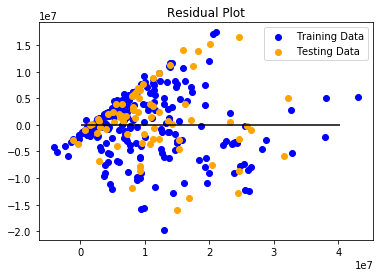

In [14]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [15]:
# model.predict(np.array([34,10.8,6.5,1.2,-1.2]).reshape(1, -1))

ValueError: shapes (1,5) and (25,) not aligned: 5 (dim 1) != 25 (dim 0)